In [1]:
# Importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mimg 
import tensorflow as tf
from tensorflow import keras
import cv2 
import PIL
from PIL import Image 

from sklearn.model_selection import train_test_split
import os

In [2]:
#Loading the dataset
with_mask_file=os.listdir('C:/Users/vkoun/Downloads/archive (1)/data/with_mask')
without_mask_file=os.listdir('C:/Users/vkoun/Downloads/archive (1)/data/without_mask')

In [3]:
# Num of images in each file
print('Num of images with mask= ',len(with_mask_file))
print('Num of images without mask= ',len(without_mask_file))

Num of images with mask=  3725
Num of images without mask=  3828


In [4]:
with_mask_label=[1]*len(with_mask_file)
without_mask_label=[0]*len(without_mask_file)

In [5]:
with_mask_label[0:5]

[1, 1, 1, 1, 1]

In [6]:
without_mask_label[0:5]

[0, 0, 0, 0, 0]

In [7]:
labels=with_mask_label+without_mask_label
print(labels[:5])
print(labels[-5:])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


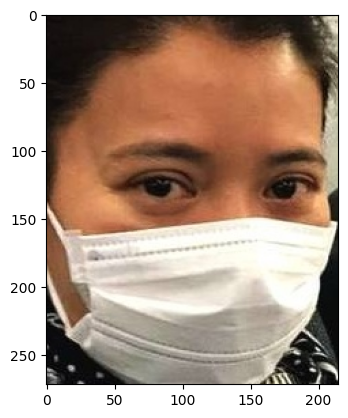

In [8]:
img=mimg.imread('C:/Users/vkoun/Downloads/archive (1)/data/with_mask/with_mask_185.jpg')
imgplot=plt.imshow(img)
plt.show()

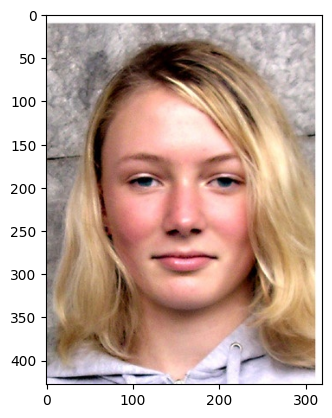

In [9]:
img=mimg.imread('C:/Users/vkoun/Downloads/archive (1)/data/without_mask/without_mask_985.jpg')
imgplot=plt.imshow(img)
plt.show()

In [10]:
#Image processing
with_mask_path = 'C:/Users/vkoun/Downloads/archive (1)/data/with_mask/'

data = []

for img_file in with_mask_file:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

C:\Users\vkoun\anaconda3\envs\MyEnvironment\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
without_mask_path = 'C:/Users/vkoun/Downloads/archive (1)/data/without_mask/'

for img_file in without_mask_file:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [12]:
len(data)

7553

In [13]:
type(data)

list

In [14]:
data[0].shape

(128, 128, 3)

In [15]:
X=np.array(data)
Y=np.array(labels)

In [16]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [18]:
x_train_scl=x_train/255
x_test_scl=x_test/255

In [19]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.50))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.50))

model.add(keras.layers.Dense(2,activation='sigmoid'))

C:\Users\vkoun\anaconda3\envs\MyEnvironment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
Model=model.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 83s 405ms/step - accuracy: 0.6778 - loss: 0.6891 - val_accuracy: 0.8956 - val_loss: 0.2443
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 75s 388ms/step - accuracy: 0.8891 - loss: 0.2800 - val_accuracy: 0.8956 - val_loss: 0.2419
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 74s 386ms/step - accuracy: 0.9069 - loss: 0.2485 - val_accuracy: 0.9235 - val_loss: 0.2018
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 74s 388ms/step - accuracy: 0.9225 - loss: 0.1947 - val_accuracy: 0.9309 - val_loss: 0.1750
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 74s 386ms/step - accuracy: 0.9388 - loss: 0.1510 - val_accuracy: 0.9353 - val_loss: 0.1945
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 81s 382ms/step - accuracy: 0.9562 - loss: 0.1127 - val_accuracy: 0.9309 - val_loss: 0.2031
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 74s 387ms/step - accuracy: 0.9520 - loss: 0.1244 - val_accuracy: 0.9294 - val_loss: 0.2379
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 75s 389ms/step - accuracy: 0.9660 - loss: 0

In [22]:
#Model evalution
loss,acc=model.evaluate(x_test_scl,y_test)
print('The Accuracy = ',int(acc*100),'%')

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.9292 - loss: 0.2401
The Accuracy =  92 %


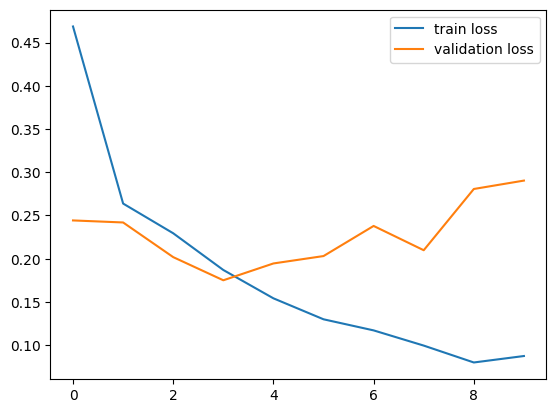

In [23]:
h = Model

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

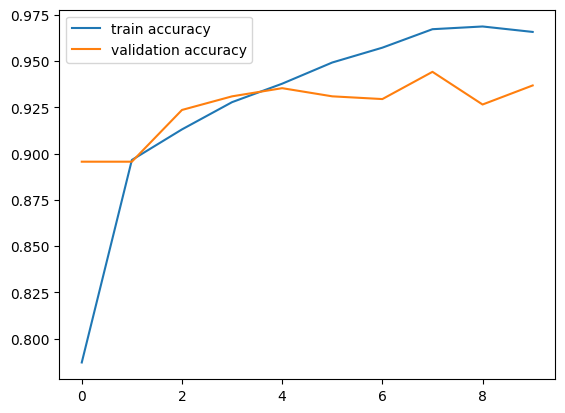

In [24]:
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Enter the image path :  C:/Users/vkoun/Downloads/archive (1)/data/without_mask/without_mask_95.jpg


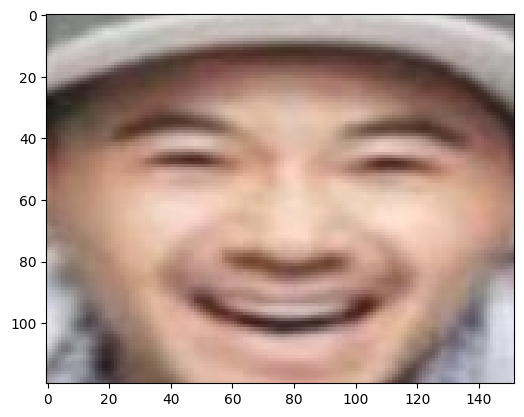

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
[[0.9070828  0.13293256]]
0
The person in the image is not wearing a mask


In [25]:
# Prediction of images
input_image=input("Enter the image path : ")
img=mimg.imread(input_image)
imgplot=plt.imshow(img)
plt.show()
img=cv2.resize(img,(128,128))
img=img/255
img=np.reshape(img,[1,128,128,3])
prediction=model.predict(img)

print(prediction)


input_pred_label = np.argmax(prediction)

print(input_pred_label)


if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')

Enter the image path :  C:/Users/vkoun/Downloads/archive (1)/data/with_mask/with_mask_585.jpg


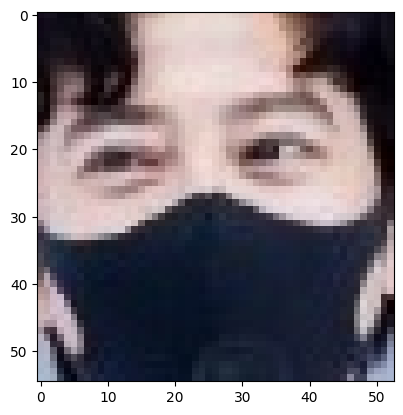

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[9.5274365e-05 9.9831706e-01]]
1
The person in the image is wearing a mask


In [26]:
input_image=input("Enter the image path : ")
img=mimg.imread(input_image)
imgplot=plt.imshow(img)
plt.show()
img=cv2.resize(img,(128,128))
img=img/255
img=np.reshape(img,[1,128,128,3])
prediction=model.predict(img)

print(prediction)


input_pred_label = np.argmax(prediction)

print(input_pred_label)


if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')